In [1]:
import warnings
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
target = pd.read_csv("../../sber_dolya_beznala.csv", sep=';')
target["date"] = pd.to_datetime(target["date"])
target["year"] = target["date"].dt.year
target = target.sort_values(by='date')
target = target[target["date"].dt.month == 1]
target = target.drop(labels=["date"], axis=1)
target = target.drop_duplicates(subset=["region", "year"])

In [3]:
life_expectancy = pd.read_csv("../data/life_expectancy/life_expectancy_features.csv")
life_expectancy = life_expectancy.rename(columns={"date": "year"})
life_expectancy.region = life_expectancy.region.replace(
    {
        "Республика Адыгея (Адыгея)": "Республика Адыгея",
        "Республика Северная Осетия-Алания": "Республика Северная Осетия — Алания",
        "Республика Татарстан (Татарстан)": "Республика Татарстан",
        "Город Москва столица Российской Федерации город федерального значения": "Москва",
        "Город Санкт-Петербург город федерального значения": "Санкт-Петербург",
        "Ямало-Ненецкий автономный округ (Тюменская область)": "Ямало-Ненецкий автономный округ",
        "Ханты-Мансийский автономный округ - Югра (Тюменская область)": "Ханты-Мансийский автономный округ — Югра",
        "Архангельская область (кроме Ненецкого автономного округа)": "Архангельская область",
        "Ненецкий автономный округ (Архангельская область)": "Ненецкий автономный округ",
        "Чувашская Республика - Чувашия": "Чувашская Республика",
        "Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)": "Тюменская область",
        "Агинский Бурятский округ (Забайкальский край)": "Забайкальский край",
        "Кемеровская область - Кузбасс": "Кемеровская область"
    }
)

final_df = pd.merge(life_expectancy, target, on=["region", "year"], how="inner")

In [4]:
# sp11 = pd.read_csv("sp11.csv")
# sp11.region = sp11.region.replace({
#     "г.Санкт-Петербург": "Санкт-Петербург",
#     "г.Москва": "Москва",
#     "Кемеровская область – Кузбасс": "Кемеровская область",
#     "Республика Северная Осетия – Алания": "Республика Северная Осетия — Алания",
#     "Ханты-Мансийский автономный округ – Югра": "Ханты-Мансийский автономный округ — Югра"
# })

# final_df = pd.merge(sp11, target, on=["region", "year"], how="inner")
# final_df

In [5]:
# sp12 = pd.read_csv("sp12.csv")
# sp12.region = sp12.region.replace({
#     "г.Санкт-Петербург": "Санкт-Петербург",
#     "г.Москва": "Москва",
#     "Кемеровская область – Кузбасс": "Кемеровская область",
#     "Республика Северная Осетия – Алания": "Республика Северная Осетия — Алания",
#     "Ханты-Мансийский автономный округ – Югра": "Ханты-Мансийский автономный округ — Югра"
# })

# final_df = pd.merge(sp12, final_df, on=["region", "year"], how="inner")
# final_df

In [7]:
cpi = pd.read_excel("../data/ipc_s_1992-2024.xlsx")
cpi = cpi.rename(columns={"Unnamed: 0": "region"})

cpi = cpi.melt(
    id_vars='region',     # Колонка, которая останется без изменений
    var_name='year',      # Название колонки для годов (ранее были отдельными колонками)
    value_name='cpi'    # Название колонки для значений
)

# (Опционально) Преобразуем дату в целое число
cpi['year'] = cpi['year'].astype(int)

# (Опционально) Сортируем по региону и дате
cpi = cpi.sort_values(['region', 'year'])
cpi.region = cpi.region.replace({
    "г.Санкт-Петербург": "Санкт-Петербург",
    "г.Москва": "Москва",
    "Кемеровская область – Кузбасс": "Кемеровская область",
    "Республика Северная Осетия – Алания": "Республика Северная Осетия — Алания",
    "Ханты-Мансийский автономный округ – Югра": "Ханты-Мансийский автономный округ — Югра",
    "Республика Адыгея (Адыгея)": "Республика Адыгея",
        "Республика Северная Осетия-Алания": "Республика Северная Осетия — Алания",
        "Республика Татарстан (Татарстан)": "Республика Татарстан",
        "Город Москва столица Российской Федерации город федерального значения": "Москва",
        "Город Санкт-Петербург город федерального значения": "Санкт-Петербург",
        "Ямало-Ненецкий автономный округ (Тюменская область)": "Ямало-Ненецкий автономный округ",
        "Ханты-Мансийский автономный округ - Югра (Тюменская область)": "Ханты-Мансийский автономный округ — Югра",
        "Архангельская область (кроме Ненецкого автономного округа)": "Архангельская область",
        "Ненецкий автономный округ (Архангельская область)": "Ненецкий автономный округ",
        "Чувашская Республика - Чувашия": "Чувашская Республика",
        "Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)": "Тюменская область",
        "Агинский Бурятский округ (Забайкальский край)": "Забайкальский край",
        "Кемеровская область - Кузбасс": "Кемеровская область"
})
final_df = pd.merge(cpi, final_df, on=["region", "year"], how="inner")
final_df.shape

(529, 58)

In [8]:
grp = pd.read_excel("../data/VRP_s_1998.xlsx", sheet_name="2")

grp = grp.melt(
    id_vars='region',     # Колонка, которая останется без изменений
    var_name='year',      # Название колонки для годов (ранее были отдельными колонками)
    value_name='grp'    # Название колонки для значений
)
grp.head()
grp['year'] = grp['year'].astype(int)

grp = grp.sort_values(['region', 'year'])
grp.region = grp.region.replace({
    "г.Санкт-Петербург": "Санкт-Петербург",
    "г.Москва": "Москва",
    "Кемеровская область – Кузбасс": "Кемеровская область",
    "Республика Северная Осетия – Алания": "Республика Северная Осетия — Алания",
    "Ханты-Мансийский автономный округ – Югра": "Ханты-Мансийский автономный округ — Югра",
    "Республика Адыгея (Адыгея)": "Республика Адыгея",
        "Республика Северная Осетия-Алания": "Республика Северная Осетия — Алания",
        "Республика Татарстан (Татарстан)": "Республика Татарстан",
        "Город Москва столица Российской Федерации город федерального значения": "Москва",
        "Город Санкт-Петербург город федерального значения": "Санкт-Петербург",
        "Ямало-Ненецкий автономный округ (Тюменская область)": "Ямало-Ненецкий автономный округ",
        "Ханты-Мансийский автономный округ - Югра (Тюменская область)": "Ханты-Мансийский автономный округ — Югра",
        "Архангельская область (кроме Ненецкого автономного округа)": "Архангельская область",
        "Ненецкий автономный округ (Архангельская область)": "Ненецкий автономный округ",
        "Чувашская Республика - Чувашия": "Чувашская Республика",
        "Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)": "Тюменская область",
        "Агинский Бурятский округ (Забайкальский край)": "Забайкальский край",
        "Кемеровская область - Кузбасс": "Кемеровская область"
})
final_df = pd.merge(grp, final_df, on=["region", "year"], how="inner")
final_df.shape

(522, 59)

In [9]:
covid_19 = pd.DataFrame([{"year": 2017, "covid": 0}, {"year": 2018, "covid": 0}, {"year": 2019, "covid": 0}, {"year": 2020, "covid": 1}, {"year": 2021, "covid": 1}, {"year": 2022, "covid": 1}, {"year": 2023, "covid": 0}])
final_df = pd.merge(final_df, covid_19)

In [10]:
fertility = pd.read_csv("../data/fertility_rate/fertility_rate_features.csv")
fertility = fertility.rename(columns={"date": "year"})

fertility.region = fertility.region.replace(
    {
        "Республика Адыгея (Адыгея)": "Республика Адыгея",
        "Республика Северная Осетия-Алания": "Республика Северная Осетия — Алания",
        "Республика Татарстан (Татарстан)": "Республика Татарстан",
        "Город Москва столица Российской Федерации город федерального значения": "Москва",
        "Город Санкт-Петербург город федерального значения": "Санкт-Петербург",
        "Ямало-Ненецкий автономный округ (Тюменская область)": "Ямало-Ненецкий автономный округ",
        "Ханты-Мансийский автономный округ - Югра (Тюменская область)": "Ханты-Мансийский автономный округ — Югра",
        "Архангельская область (кроме Ненецкого автономного округа)": "Архангельская область",
        "Ненецкий автономный округ (Архангельская область)": "Ненецкий автономный округ",
        "Чувашская Республика - Чувашия": "Чувашская Республика",
        "Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)": "Тюменская область",
        "Агинский Бурятский округ (Забайкальский край)": "Забайкальский край",
        "Кемеровская область - Кузбасс": "Кемеровская область"
    }
)


final_df = pd.merge(fertility, final_df, on=["region", "year"], how="inner")
final_df.shape

(558, 78)

In [11]:
death_rate = pd.read_csv("../data/death_rate/death_rate_features.csv")
death_rate = death_rate.rename(columns={"date": "year"})

death_rate.region = death_rate.region.replace(
    {
        "Республика Адыгея (Адыгея)": "Республика Адыгея",
        "Республика Северная Осетия-Алания": "Республика Северная Осетия — Алания",
        "Республика Татарстан (Татарстан)": "Республика Татарстан",
        "Город Москва столица Российской Федерации город федерального значения": "Москва",
        "Город Санкт-Петербург город федерального значения": "Санкт-Петербург",
        "Ямало-Ненецкий автономный округ (Тюменская область)": "Ямало-Ненецкий автономный округ",
        "Ханты-Мансийский автономный округ - Югра (Тюменская область)": "Ханты-Мансийский автономный округ — Югра",
        "Архангельская область (кроме Ненецкого автономного округа)": "Архангельская область",
        "Архангельская область (без АО)": "Архангельская область",
        "Ненецкий автономный округ (Архангельская область)": "Ненецкий автономный округ",
        "Чувашская Республика - Чувашия": "Чувашская Республика",
        "Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)": "Тюменская область",
        "Агинский Бурятский округ (Забайкальский край)": "Забайкальский край",
        "Кемеровская область - Кузбасс": "Кемеровская область"
    }
)

final_df = pd.merge(death_rate, final_df, on=["region", "year"], how="inner")
final_df.shape

(549, 93)

In [12]:
nes_data = pd.read_csv("../data/hse_data/share_nes.csv")
nes_data = nes_data.rename(columns={"Year": "year", "Reg": "region"})
final_df = pd.merge(nes_data, final_df, on=["region", "year"], how="inner")

In [39]:
df = final_df.set_index(['region', 'year']).copy().fillna(-1)
cols_to_drop = ["fertility_rate_city", "fertility_rate_all", "fertility_rate_village", "life_expectancy_both_sex_village",
                "life_expectancy_both_sex_all", "life_expectancy_female_sex_village",
                'life_expectancy_both_sex_city',
       'life_expectancy_male_sex_city', 'life_expectancy_male_sex_village',
       'life_expectancy_female_sex_city', 'life_expectancy_female_sex_all', "death_rate_all", "death_rate_village", "death_rate_city",
       'life_expectancy_male_sex_all', "PopD5a0", "PopD5a1", "PopD5a5", "PopD5a10", "PopD5a80", "PopD5a85", "covid"]

age_structure_merged = ["old", "middle", "young"]
age_structure = [col for col in df.columns if "PopD5a" in col and col not in ["PopD5a0", "PopD5a1", "PopD5a5", "PopD5a10"]]
control = ["cpi", "grp"]
le = [col for col in df.columns if "life_expectancy" in col]
dr = [col for col in df.columns if "death_rate_" in col]
fr = [col for col in df.columns if "fertility_rate_" in col]

In [44]:
def calculate_vif(data, target_column=None):
    if target_column:
        features = data.drop(labels=target_column, axis=1)
    else:
        features = data.copy()
    features_with_const = sm.add_constant(features)
    vif = pd.DataFrame()
    vif["Variable"] = features_with_const.columns
    vif["VIF"] = [variance_inflation_factor(features_with_const.values, i) 
                  for i in range(features_with_const.shape[1])]
    vif = vif[vif["Variable"] != "const"]
    return vif


def remove_high_vif(data, threshold=5, target_column=None):
    if target_column:
        features = data.drop(labels=[target_column], axis=1)
    else:
        features = data.copy()
    
    while True:
        vif_df = calculate_vif(features, target_column)
        max_vif = vif_df["VIF"].max()
        if max_vif <= threshold:
            break
        max_vif_row = vif_df[vif_df["VIF"] == max_vif]
        feature_to_remove = max_vif_row["Variable"].values[0]
        features = features.drop(columns=[feature_to_remove])
    
    return features

cleaned_data = remove_high_vif(df.drop(labels=["value"] + cols_to_drop + control, axis=1, errors="ignore"), threshold=5, target_column=None)

In [42]:
df["young"] = df["PopD5a15"] + df["PopD5a20"]+ df["PopD5a25"]+ df["PopD5a30"] + df["PopD5a35"]
df["middle"] = df["PopD5a40"] + df["PopD5a45"]+ df["PopD5a50"]+ df["PopD5a55"] + df["PopD5a60"]
df["old"] = df["PopD5a65"] + df["PopD5a70"]+ df["PopD5a75"]+ df["PopD5a80"] + df["PopD5a85"]

In [45]:
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel.results import compare
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan


cleaned_by_vif_cols = cleaned_data.columns.tolist()
fe_model = PanelOLS(
    df['value'],
    # df[control + age_structure + le + dr],
    df[cleaned_by_vif_cols + control],
    # df.drop(labels=["value"], axis=1, errors="ignore"),
    # df[fe_model.pvalues[fe_model.pvalues < 0.05].index.tolist()],
    entity_effects=True,
    time_effects=False,
    drop_absorbed=True
).fit(cov_type='clustered', cluster_entity=True)
print(fe_model)



                          PanelOLS Estimation Summary                           
Dep. Variable:                  value   R-squared:                        0.9684
Estimator:                   PanelOLS   R-squared (Between):             -6.8384
No. Observations:                 549   R-squared (Within):               0.9684
Date:                Sat, May 17 2025   R-squared (Overall):             -6.0082
Time:                        16:29:57   Log-likelihood                   -1024.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      784.03
Entities:                          71   P-value                           0.0000
Avg Obs:                       7.7324   Distribution:                  F(18,460)
Min Obs:                       1.0000                                           
Max Obs:                       96.000   F-statistic (robust):          2.537e+04
                            

In [46]:
float(3.895e-07)

3.895e-07

In [23]:
fe_model.pvalues[fe_model.pvalues < 0.05].index.tolist()

['cpi',
 'covid',
 'PopD5a80',
 'life_expectancy_both_sex_village_lag_3',
 'life_expectancy_female_sex_village_lag_3',
 'life_expectancy_both_sex_city_lag_20',
 'life_expectancy_both_sex_city_lag_15',
 'life_expectancy_male_sex_city_lag_15',
 'life_expectancy_male_sex_city_lag_3',
 'life_expectancy_male_sex_village_lag_15',
 'life_expectancy_male_sex_village_lag_3',
 'life_expectancy_female_sex_city_lag_20',
 'life_expectancy_female_sex_city_lag_15',
 'life_expectancy_female_sex_all_lag_15',
 'life_expectancy_male_sex_all_lag_20',
 'life_expectancy_male_sex_all_lag_10']

In [47]:
fe_model.summary.as_latex()

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}                                 &       value        & \\textbf{  R-squared:         }   &      0.9684      \\\\\n\\textbf{Estimator:}                                     &      PanelOLS      & \\textbf{  R-squared (Between):}  &     -6.8384      \\\\\n\\textbf{No. Observations:}                              &        549         & \\textbf{  R-squared (Within):}   &      0.9684      \\\\\n\\textbf{Date:}                                          &  Sat, May 17 2025  & \\textbf{  R-squared (Overall):}  &     -6.0082      \\\\\n\\textbf{Time:}                                          &      16:29:57      & \\textbf{  Log-likelihood     }   &     -1024.2      \\\\\n\\textbf{Cov. Estimator:}                                &     Clustered      & \\textbf{                     }   &                  \\\\\n\\textbf{}                                               &                    & \\textbf{  F-statistic:       }  

In [18]:
import numpy as np
from scipy.stats import chi2

b_fe = fe_model.params.values
b_re = re_model.params.values

diff = b_fe - b_re

cov_diff = fe_model.cov.values - re_model.cov.values
inv_cov_diff = np.linalg.inv(cov_diff)
hausman_stat = diff.T @ inv_cov_diff @ diff

chi2.sf(hausman_stat, len(b_fe))

NameError: name 're_model' is not defined

In [ ]:
# Тест Бреуша-Пагана
residuals = fe_model.resids
exog = sm.add_constant(df[cleaned_by_vif_cols])
bp_test = het_breuschpagan(residuals, exog)
print(f"\nBreusch-Pagan Test: LM={bp_test[0]:.2f}, p={bp_test[1]:.3f}")

In [28]:
effects = fe_model.estimated_effects.reset_index().drop(labels=["year"], axis=1).drop_duplicates(subset=["region"])

In [30]:
effects.to_latex()

'\\begin{tabular}{llr}\n\\toprule\n & region & estimated_effects \\\\\n\\midrule\n0 & Алтайский край & -277.431724 \\\\\n6 & Амурская область & -268.673811 \\\\\n12 & Архангельская область & -268.894587 \\\\\n18 & Астраханская область & -300.150699 \\\\\n24 & Белгородская область & -292.015619 \\\\\n30 & Брянская область & -287.715698 \\\\\n36 & Владимирская область & -278.297375 \\\\\n42 & Волгоградская область & -286.215865 \\\\\n48 & Вологодская область & -274.200383 \\\\\n54 & Воронежская область & -280.796819 \\\\\n60 & Забайкальский край & -276.895959 \\\\\n66 & Ивановская область & -279.470854 \\\\\n72 & Кабардино-Балкарская Республика & -335.327107 \\\\\n78 & Калининградская область & -281.585181 \\\\\n84 & Калужская область & -286.641224 \\\\\n90 & Камчатский край & -281.846386 \\\\\n96 & Карачаево-Черкесская Республика & -327.029673 \\\\\n102 & Кировская область & -273.703363 \\\\\n108 & Костромская область & -282.018729 \\\\\n114 & Краснодарский край & -302.466272 \\\\\n120 

In [50]:
# Получение коэффициентов и доверительных интервалов
params = fe_model.params
conf_int = fe_model.conf_int()
conf_int.columns = ['lower', 'upper']

In [51]:
# Предположим, что cleaned_by_vif_cols — список ваших регрессоров
fe_params = params[fe_model.pvalues[fe_model.pvalues < 0.05].index.tolist()]
fe_conf_int = conf_int.loc[fe_model.pvalues[fe_model.pvalues < 0.05].index.tolist()]

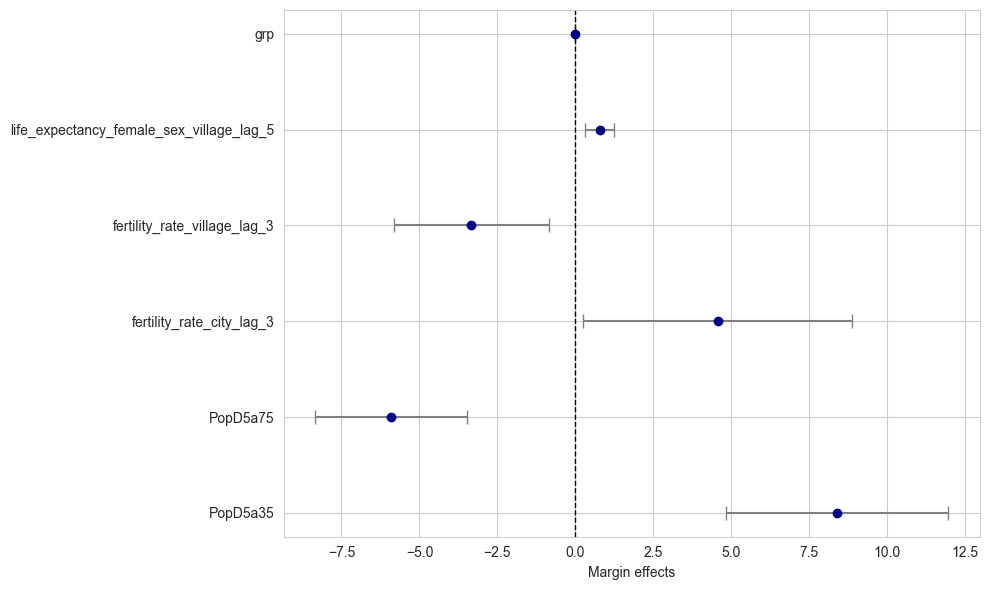

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Подготовка данных
variables = fe_params.index
estimates = fe_params.values
lower = fe_conf_int['lower'].values
upper = fe_conf_int['upper'].values

# График
fig, ax = plt.subplots(figsize=(10, 6))
y_ticks = range(len(variables))

ax.errorbar(estimates, y_ticks, xerr=[estimates - lower, upper - estimates],
            fmt='o', ecolor='gray', capsize=5, color='navy')
ax.set_yticks(y_ticks)
ax.set_yticklabels(variables)
ax.set_xlabel("Margin effects")
ax.axvline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()